In [1]:
using MLJ

In [2]:
using CSV
using DataFrames
using Plots

In [3]:
crop = CSV.read("./L08-silage.csv", DataFrame)

,obs_yield,precip,rad,maxt,mint,sat,hyd,clay,bulk
,Float64?,Float64,Float64,Float64,Float64,Float64?,Float64?,Float64?,Float64?
1,31.7,377.2,19.42,25.98,12.53,0.43,753.36,0.04,1.23
2,31.7,377.2,19.42,25.98,12.53,0.48,717.67,0.04,1.13
3,31.7,377.2,19.42,25.98,12.53,0.41,1018.21,0.04,1.34
4,39.9,339.78,19.23,23.8,11.32,0.47,124.82,0.07,1.08
5,39.9,339.78,19.23,23.8,11.32,0.43,94.35,0.08,1.13
6,39.9,339.78,19.23,23.8,11.32,0.43,72.21,0.08,1.2
7,37.88,330.57,19.91,24.84,13.94,0.43,504.38,0.03,1.29
8,37.88,330.57,19.91,24.84,13.94,0.4,69.36,0.1,1.33
9,37.88,330.57,19.91,24.84,13.94,0.39,71.27,0.07,1.24


In [4]:
crop = dropmissing(crop);

In [5]:
names(crop)

13-element Vector{String}:
 "obs_yield"
 "precip"
 "rad"
 "maxt"
 "mint"
 "sat"
 "hyd"
 "clay"
 "bulk"
 "water"
 "lat"
 "long"
 "elev"

In [6]:
y, X = unpack(crop, ==(:obs_yield), !=(:water), c -> true);

In [7]:
models(matching(X, y))

59-element Vector{NamedTuple{(:name, :package_name, :is_supervised, :deep_properties, :docstring, :hyperparameter_ranges, :hyperparameter_types, :hyperparameters, :implemented_methods, :is_pure_julia, :is_wrapper, :iteration_parameter, :load_path, :package_license, :package_url, :package_uuid, :prediction_type, :supports_class_weights, :supports_online, :supports_training_losses, :supports_weights, :input_scitype, :target_scitype, :output_scitype), T} where T<:Tuple}:
 (name = ARDRegressor, package_name = ScikitLearn, ... )
 (name = AdaBoostRegressor, package_name = ScikitLearn, ... )
 (name = BaggingRegressor, package_name = ScikitLearn, ... )
 (name = BayesianRidgeRegressor, package_name = ScikitLearn, ... )
 (name = ConstantRegressor, package_name = MLJModels, ... )
 (name = DecisionTreeRegressor, package_name = BetaML, ... )
 (name = DecisionTreeRegressor, package_name = DecisionTree, ... )
 (name = DeterministicConstantRegressor, package_name = MLJModels, ... )
 (name = DummyRegre

In [8]:
train, test = partition(eachindex(y), 0.7)

([1, 2, 3, 4, 5, 6, 7, 8, 9, 10  …  1045, 1046, 1047, 1048, 1049, 1050, 1051, 1052, 1053, 1054], [1055, 1056, 1057, 1058, 1059, 1060, 1061, 1062, 1063, 1064  …  1497, 1498, 1499, 1500, 1501, 1502, 1503, 1504, 1505, 1506])

## Linear Regression

In [9]:
LinearRegressor = @load LinearRegressor pkg=MLJLinearModels

import MLJLinearModels ✔

┌ Info: For silent loading, specify `verbosity=0`. 
└ @ Main /Users/tomyun/.julia/packages/MLJModels/5itei/src/loading.jl:168


MLJLinearModels.LinearRegressor

In [10]:
lr = LinearRegressor()

LinearRegressor(
    fit_intercept = true,
    solver = nothing) @876

In [11]:
lr_mach = machine(lr, X, y)

Machine{LinearRegressor,…} @358 trained 0 times; caches data
  args: 
    1:	Source @399 ⏎ `Table{AbstractVector{Continuous}}`
    2:	Source @234 ⏎ `AbstractVector{Continuous}`


In [12]:
fit!(lr_mach, rows = train)

┌ Info: Training Machine{LinearRegressor,…} @358.
└ @ MLJBase /Users/tomyun/.julia/packages/MLJBase/rN59G/src/machines.jl:354


Machine{LinearRegressor,…} @358 trained 1 time; caches data
  args: 
    1:	Source @399 ⏎ `Table{AbstractVector{Continuous}}`
    2:	Source @234 ⏎ `AbstractVector{Continuous}`


In [13]:
fitted_params(lr_mach).coefs

11-element Vector{Pair{Symbol, Float64}}:
 :precip => 0.0018615109477514923
    :rad => 0.39801618650503306
   :maxt => 0.14686012273387786
   :mint => 0.12948216358151401
    :sat => -15.072067457462024
    :hyd => 0.004252388268276441
   :clay => -6.703695470715136
   :bulk => 0.026535811320700806
    :lat => 0.8583984051963485
   :long => 0.779484433871202
   :elev => 0.005837400731311054

In [14]:
fitted_params(lr_mach).intercept

47.87923623599187

In [15]:
lr_ŷ_train = predict(lr_mach, X[train, :]);

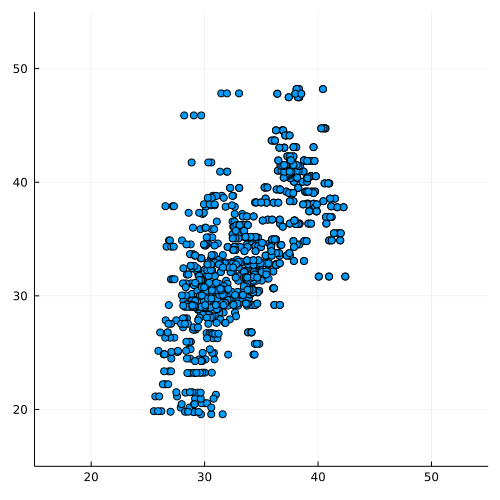

In [16]:
scatter(lr_ŷ_train, y[train]; label = "", xlim = (15, 55), ylim = (15, 55), size = (500, 500))

In [17]:
rmse(lr_ŷ_train, y[train])

4.24387252872614

In [18]:
lr_ŷ_test = predict(lr_mach, X[test, :]);

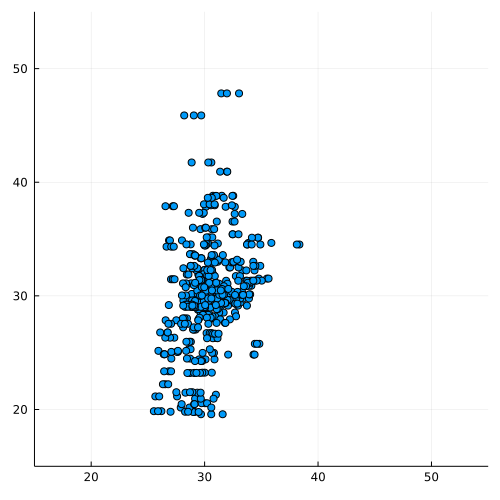

In [19]:
scatter(lr_ŷ_test, y[test]; label = "", xlim = (15, 55), ylim = (15, 55), size = (500, 500))

In [20]:
rmse(lr_ŷ_test, y[test])

4.7504414531154175

## Random Forest

In [21]:
RandomForestRegressor = @load RandomForestRegressor pkg=DecisionTree

import MLJDecisionTreeInterface ✔


┌ Info: For silent loading, specify `verbosity=0`. 
└ @ Main /Users/tomyun/.julia/packages/MLJModels/5itei/src/loading.jl:168


MLJDecisionTreeInterface.RandomForestRegressor

In [22]:
rf = RandomForestRegressor()

RandomForestRegressor(
    max_depth = -1,
    min_samples_leaf = 1,
    min_samples_split = 2,
    min_purity_increase = 0.0,
    n_subfeatures = -1,
    n_trees = 10,
    sampling_fraction = 0.7,
    pdf_smoothing = 0.0,
    rng = Random._GLOBAL_RNG()) @753

In [23]:
evaluate(rf, X, y)

Evaluating over 6 folds: 100%[=========================] Time: 0:00:00


┌───────────────────────────┬───────────────┬───────────────────────────────────
│ _.measure                 │ _.measurement │ _.per_fold                       ⋯
├───────────────────────────┼───────────────┼───────────────────────────────────
│ RootMeanSquaredError @820 │ 1.28          │ [1.11, 1.19, 1.57, 1.1, 1.04, 1. ⋯
└───────────────────────────┴───────────────┴───────────────────────────────────
                                                                1 column omitted
_.per_observation = [missing]
_.fitted_params_per_fold = [ … ]
_.report_per_fold = [ … ]
_.train_test_rows = [ … ]


In [24]:
rf_mach = machine(rf, X, y)

Machine{RandomForestRegressor,…} @050 trained 0 times; caches data
  args: 
    1:	Source @856 ⏎ `Table{AbstractVector{Continuous}}`
    2:	Source @448 ⏎ `AbstractVector{Continuous}`


In [25]:
fit!(rf_mach, rows = train)

┌ Info: Training Machine{RandomForestRegressor,…} @050.
└ @ MLJBase /Users/tomyun/.julia/packages/MLJBase/rN59G/src/machines.jl:354


Machine{RandomForestRegressor,…} @050 trained 1 time; caches data
  args: 
    1:	Source @856 ⏎ `Table{AbstractVector{Continuous}}`
    2:	Source @448 ⏎ `AbstractVector{Continuous}`


In [26]:
rf_mach.model

RandomForestRegressor(
    max_depth = -1,
    min_samples_leaf = 1,
    min_samples_split = 2,
    min_purity_increase = 0.0,
    n_subfeatures = -1,
    n_trees = 10,
    sampling_fraction = 0.7,
    pdf_smoothing = 0.0,
    rng = Random._GLOBAL_RNG()) @753

In [27]:
fitted_params(rf_mach).forest

Ensemble of Decision Trees
Trees:      10
Avg Leaves: 313.1
Avg Depth:  20.1

In [28]:
#import DecisionTree
#DecisionTree.print_tree(fitted_params(rf_mach).forest.trees[1], 5)

In [29]:
rf_ŷ_train = predict(rf_mach, X[train, :]);

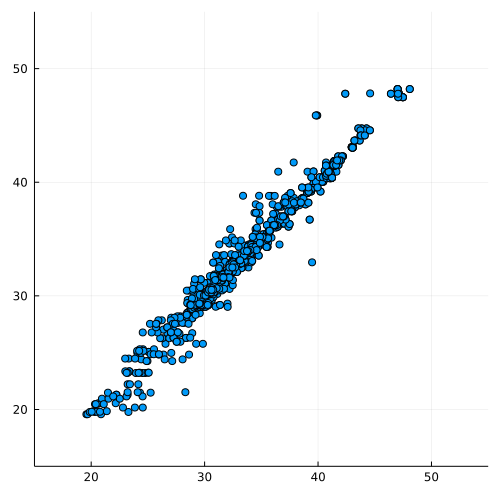

In [30]:
scatter(rf_ŷ_train, y[train]; label = "", xlim = (15, 55), ylim = (15, 55), size = (500, 500))

In [31]:
rmse(rf_ŷ_train, y[train])

1.0390122649503564

In [32]:
rf_ŷ_test = predict(rf_mach, X[test, :]);

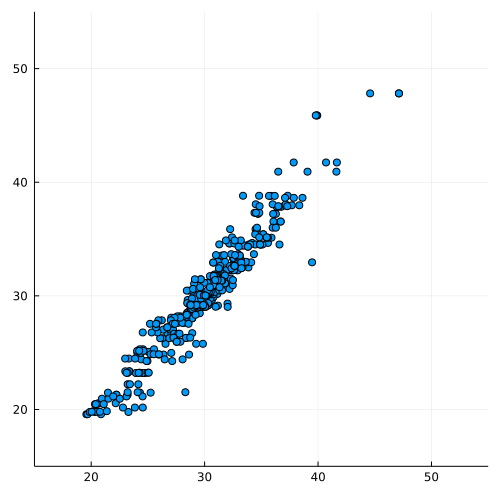

In [33]:
scatter(rf_ŷ_test, y[test]; label = "", xlim = (15, 55), ylim = (15, 55), size = (500, 500))

In [34]:
rmse(rf_ŷ_test, y[test])

1.4416279859936139

## Neural Network

In [35]:
using Flux

In [36]:
NeuralNetworkRegressor = @load NeuralNetworkRegressor

import MLJFlux ✔

┌ Info: For silent loading, specify `verbosity=0`. 
└ @ Main /Users/tomyun/.julia/packages/MLJModels/5itei/src/loading.jl:168


MLJFlux.NeuralNetworkRegressor

In [37]:
builder = MLJFlux.@builder Chain(Dense(n_in, 64), Dense(64, 64), Dense(64, n_out))
nn = NeuralNetworkRegressor(; builder)

NeuralNetworkRegressor(
    builder = GenericBuilder(
            apply = var"#3#4"()),
    optimiser = ADAM(0.001, (0.9, 0.999), IdDict{Any, Any}()),
    loss = Flux.Losses.mse,
    epochs = 10,
    batch_size = 1,
    lambda = 0.0,
    alpha = 0.0,
    rng = Random._GLOBAL_RNG(),
    optimiser_changes_trigger_retraining = false,
    acceleration = CPU1{Nothing}(nothing)) @415

In [38]:
nn_mach = machine(nn, X, y)

Machine{NeuralNetworkRegressor{GenericBuilder{#3#4},…},…} @262 trained 0 times; caches data
  args: 
    1:	Source @968 ⏎ `Table{AbstractVector{Continuous}}`
    2:	Source @514 ⏎ `AbstractVector{Continuous}`


In [39]:
fit!(nn_mach, rows = train)

┌ Info: Training Machine{NeuralNetworkRegressor{GenericBuilder{#3#4},…},…} @262.
└ @ MLJBase /Users/tomyun/.julia/packages/MLJBase/rN59G/src/machines.jl:354
Optimising neural net:100%[=========================] Time: 0:00:10


Machine{NeuralNetworkRegressor{GenericBuilder{#3#4},…},…} @262 trained 1 time; caches data
  args: 
    1:	Source @968 ⏎ `Table{AbstractVector{Continuous}}`
    2:	Source @514 ⏎ `AbstractVector{Continuous}`


In [40]:
fitted_params(nn_mach).chain

Chain(
  Dense(11, 64),                        # 768 parameters
  Dense(64, 64),                        # 4_160 parameters
  Dense(64, 1),                         # 65 parameters
)                   # Total: 6 arrays, 4_993 parameters, 19.879 KiB.

In [41]:
curve = learning_curve(nn, X, y;
    range = range(nn, :epochs, lower = 1, upper = 200, scale = :log10))

┌ Info: No measure specified. Setting measure=RootMeanSquaredError @820. 
└ @ MLJTuning /Users/tomyun/.julia/packages/MLJTuning/l8Cvp/src/tuned_models.jl:312
┌ Info: Training Machine{DeterministicTunedModel{Grid,…},…} @781.
└ @ MLJBase /Users/tomyun/.julia/packages/MLJBase/rN59G/src/machines.jl:354
┌ Info: Attempting to evaluate 25 models.
└ @ MLJTuning /Users/tomyun/.julia/packages/MLJTuning/l8Cvp/src/tuned_models.jl:684
Evaluating over 25 metamodels: 100%[=========================] Time: 0:01:27


(parameter_name = "epochs",
 parameter_scale = :log10,
 parameter_values = [1, 2, 3, 4, 5, 6, 7, 9, 11, 13  …  39, 46, 56, 67, 80, 96, 116, 139, 167, 200],
 measurements = [7.487344355382768, 7.034322390005331, 6.777762271057115, 10.245177963299646, 10.222605335694192, 10.411911484557157, 10.755327044915635, 9.839674630315292, 9.815710805541148, 9.51935285745269  …  6.666007864409157, 6.220322079909621, 6.2828838917194325, 5.820901832910207, 5.595369575331486, 5.401377747070154, 5.340809354499958, 5.1818495129378475, 5.025197537149988, 4.941010548176277],)

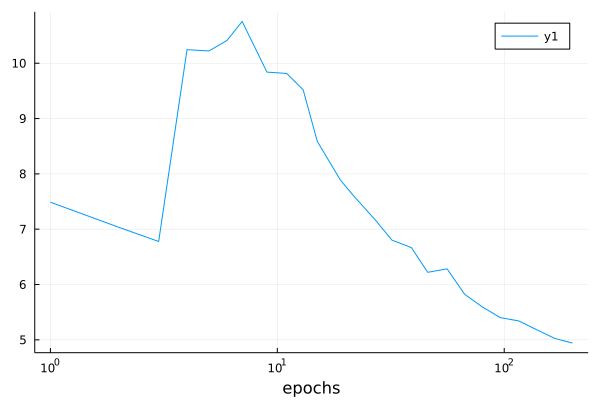

In [42]:
plot(curve.parameter_values, curve.measurements;
    xlab = curve.parameter_name,
    xscale = curve.parameter_scale,
)

In [43]:
nn_ŷ_train = predict(nn_mach, X[train, :]);

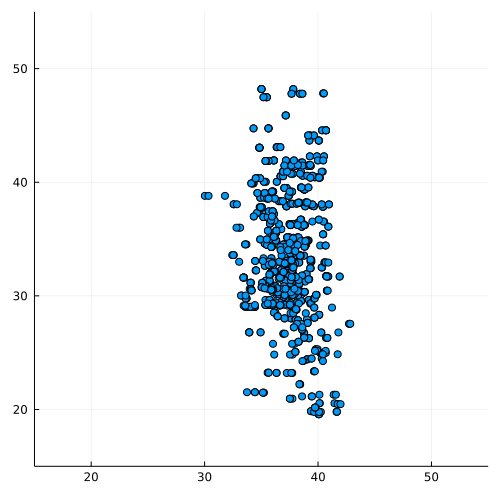

In [44]:
scatter(nn_ŷ_train, y[train]; label = "", xlim = (15, 55), ylim = (15, 55), size = (500, 500))

In [45]:
rmse(nn_ŷ_train, y[train])

7.161072394544416

In [46]:
nn_ŷ_test = predict(nn_mach, X[test, :]);

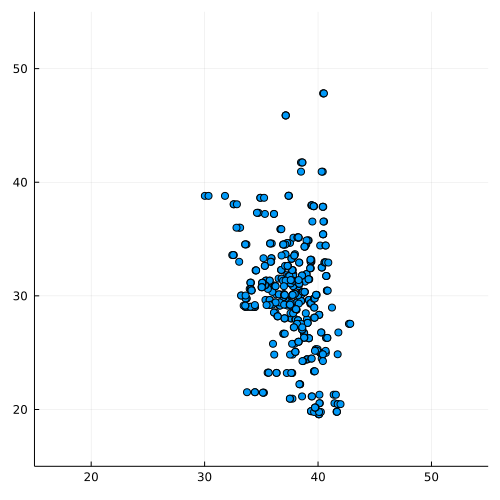

In [47]:
scatter(nn_ŷ_test, y[test]; label = "", xlim = (15, 55), ylim = (15, 55), size = (500, 500))

In [48]:
rmse(nn_ŷ_test, y[test])

9.635374398823261